In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [288]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [289]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [290]:
def remove_outliers(df, col, threshold = 2):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 2)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [291]:
df.reset_index(drop=True,inplace=True)

In [292]:
df.drop(all_indices,axis=0,inplace= True)

In [293]:
df['sqft_lot'].describe()

count    14215.000000
mean      7580.340063
std       4598.203822
min        520.000000
25%       4750.000000
50%       7140.000000
75%       9315.000000
max      32780.000000
Name: sqft_lot, dtype: float64

In [297]:
df = df.loc[df['condition']>=3]

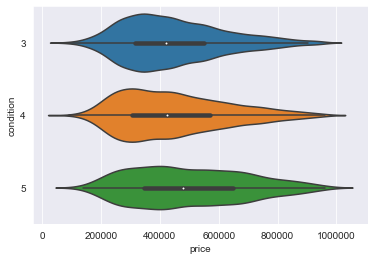

In [298]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [299]:
df['condition'].value_counts()

3    9224
4    3752
5    1112
Name: condition, dtype: int64

In [300]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

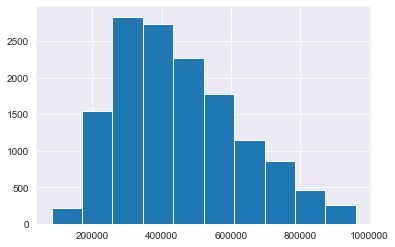

In [301]:
df['price'].hist()

In [302]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

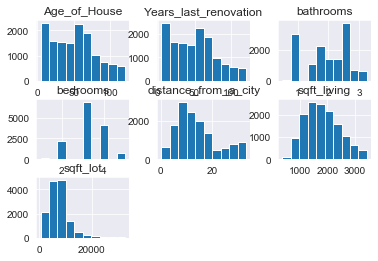

In [303]:
df[features].hist();

In [304]:
df.shape

(14088, 22)

In [305]:
tobox =['sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

In [306]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


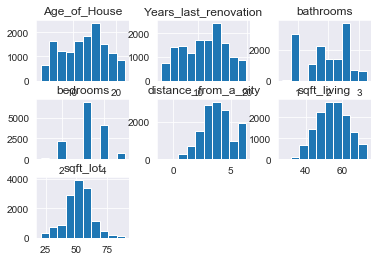

In [307]:
df[features].hist();

In [308]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [309]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House','grade',
           'Years_last_renovation']


In [310]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [311]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [237]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond3',
       'cond4', 'cond5'],
      dtype='object')

In [285]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Age_of_House','basement','bedbath','grade']
outcome = ['price']

In [280]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement','grade']
outcome = ['price']

In [315]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement', 'cond3','grade','biggerliving','biggerlot',
 'cond4', 'cond5']
outcome = ['price']

In [316]:
X = df[x_cols]
y = df['price']

In [317]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2507.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:15:48   Log-Likelihood:            -1.8213e+05
No. Observations:               14088   AIC:                         3.643e+05
Df Residuals:                   14075   BIC:                         3.644e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.274e+04   1115.355    -11.419      0.000   -1.49e+04   -1.05e+04
bathrooms              4297.2712   1408.861      3.050      0.002    1535.716    7058.826
sqft_living            9.138e+04   1753.940     52.101      0.000    8.79e+04    9.48e+04
sqft_lot               3347.8319   1097.960      3.049      0.002    1195.685    5499.979
distance_from_a_city  -9.558e+04   1015.496    -94.126      0.000   -9.76e+04   -9.36e+04
Years_last_renovation  1.684e+04   1334.924     12.618      0.000    1.42e+04    1.95e+04
basement              -2.468e+04   1926.763    -12.807      0.000   -2.85e+04   -2.09e+04
cond3                   4.64e+05   1621.945    286.051      0.000    4.61e+05    4.67e+05
grade                  5.208e+04   1280.827     40.663      0.000    4.96e+04    5.46e+04
biggerliving          -2.741e+04   2065.775    -13.267      0.000   -3.15e+04   -2.34e+04
biggerlot             -1687.3074   1841.371     -0.916      0.360   -5296.638    1922.023
cond4                   4.82e+05   2116.624    227.733      0.000    4.78e+05    4.86e+05
cond5                  5.092e+05   3367.614    151.217      0.000    5.03e+05    5.16e+05
==============================================================================
Omnibus:                      354.656   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.689
Skew:                           0.288   Prob(JB):                    1.03e-107
Kurtosis:                       3.712   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 12
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.274e+04,1115.355,-11.419,0.000,-1.49e+04,-1.05e+04
bathrooms,4297.2712,1408.861,3.050,0.002,1535.716,7058.826
sqft_living,9.138e+04,1753.940,52.101,0.000,8.79e+04,9.48e+04
sqft_lot,3347.8319,1097.960,3.049,0.002,1195.685,5499.979
distance_from_a_city,-9.558e+04,1015.496,-94.126,0.000,-9.76e+04,-9.36e+04


In [319]:
X = df[x_cols]
y= df['price']

In [320]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2735.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:15:53   Log-Likelihood:            -1.8213e+05
No. Observations:               14088   AIC:                         3.643e+05
Df Residuals:                   14076   BIC:                         3.644e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.271e+04   1114.932    -11.398      0.000   -1.49e+04   -1.05e+04
bathrooms              4237.5832   1407.347      3.011      0.003    1478.997    6996.169
sqft_living            9.141e+04   1753.555     52.131      0.000     8.8e+04    9.49e+04
sqft_lot               3051.8859   1049.378      2.908      0.004     994.965    5108.807
distance_from_a_city  -9.554e+04   1014.168    -94.203      0.000   -9.75e+04   -9.35e+04
Years_last_renovation  1.691e+04   1333.124     12.682      0.000    1.43e+04    1.95e+04
basement              -2.467e+04   1926.737    -12.803      0.000   -2.84e+04   -2.09e+04
cond3                  4.633e+05   1478.378    313.416      0.000     4.6e+05    4.66e+05
grade                  5.211e+04   1280.470     40.695      0.000    4.96e+04    5.46e+04
biggerliving          -2.751e+04   2062.898    -13.334      0.000   -3.16e+04   -2.35e+04
cond4                  4.815e+05   2036.853    236.393      0.000    4.78e+05    4.85e+05
cond5                  5.087e+05   3314.777    153.463      0.000    5.02e+05    5.15e+05
==============================================================================
Omnibus:                      354.425   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.732
Skew:                           0.288   Prob(JB):                    1.01e-107
Kurtosis:                       3.713   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.761985166361639),
 ('bathrooms', 2.8074214510575386),
 ('sqft_living', 4.358573096977727),
 ('sqft_lot', 1.5608805316891092),
 ('distance_from_a_city', 1.4578926930619733),
 ('Years_last_renovation', 2.519106444126856),
 ('basement', 1.2232696421194516),
 ('cond3', 2.0285105615113688),
 ('grade', 2.324043070421878),
 ('biggerliving', 1.4532029615208424),
 ('cond4', 1.5662785881391834),
 ('cond5', 1.2294200248821514)]

In [322]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

12 12


In [323]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2735.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:15:56   Log-Likelihood:            -1.8213e+05
No. Observations:               14088   AIC:                         3.643e+05
Df Residuals:                   14076   BIC:                         3.644e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.271e+04   1114.932    -11.398      0.000   -1.49e+04   -1.05e+04
bathrooms              4237.5832   1407.347      3.011      0.003    1478.997    6996.169
sqft_living            9.141e+04   1753.555     52.131      0.000     8.8e+04    9.49e+04
sqft_lot               3051.8859   1049.378      2.908      0.004     994.965    5108.807
distance_from_a_city  -9.554e+04   1014.168    -94.203      0.000   -9.75e+04   -9.35e+04
Years_last_renovation  1.691e+04   1333.124     12.682      0.000    1.43e+04    1.95e+04
basement              -2.467e+04   1926.737    -12.803      0.000   -2.84e+04   -2.09e+04
cond3                  4.633e+05   1478.378    313.416      0.000     4.6e+05    4.66e+05
grade                  5.211e+04   1280.470     40.695      0.000    4.96e+04    5.46e+04
biggerliving          -2.751e+04   2062.898    -13.334      0.000   -3.16e+04   -2.35e+04
cond4                  4.815e+05   2036.853    236.393      0.000    4.78e+05    4.85e+05
cond5                  5.087e+05   3314.777    153.463      0.000    5.02e+05    5.15e+05
==============================================================================
Omnibus:                      354.425   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.732
Skew:                           0.288   Prob(JB):                    1.01e-107
Kurtosis:                       3.713   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2735.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:15:58   Log-Likelihood:            -1.8213e+05
No. Observations:               14088   AIC:                         3.643e+05
Df Residuals:                   14076   BIC:                         3.644e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.271e+04   1114.932    -11.398      0.000   -1.49e+04   -1.05e+04
bathrooms              4237.5832   1407.347      3.011      0.003    1478.997    6996.169
sqft_living            9.141e+04   1753.555     52.131      0.000     8.8e+04    9.49e+04
sqft_lot               3051.8859   1049.378      2.908      0.004     994.965    5108.807
distance_from_a_city  -9.554e+04   1014.168    -94.203      0.000   -9.75e+04   -9.35e+04
Years_last_renovation  1.691e+04   1333.124     12.682      0.000    1.43e+04    1.95e+04
basement              -2.467e+04   1926.737    -12.803      0.000   -2.84e+04   -2.09e+04
cond3                  4.633e+05   1478.378    313.416      0.000     4.6e+05    4.66e+05
grade                  5.211e+04   1280.470     40.695      0.000    4.96e+04    5.46e+04
biggerliving          -2.751e+04   2062.898    -13.334      0.000   -3.16e+04   -2.35e+04
cond4                  4.815e+05   2036.853    236.393      0.000    4.78e+05    4.85e+05
cond5                  5.087e+05   3314.777    153.463      0.000    5.02e+05    5.15e+05
==============================================================================
Omnibus:                      354.425   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.732
Skew:                           0.288   Prob(JB):                    1.01e-107
Kurtosis:                       3.713   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

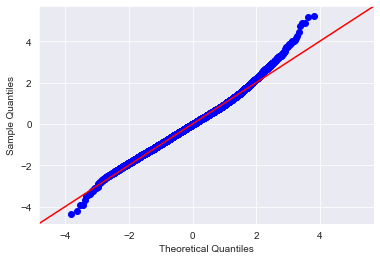

In [325]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


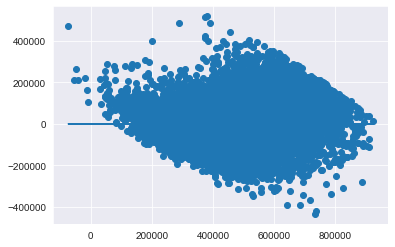

In [326]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

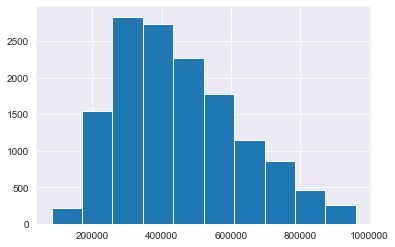

In [327]:
df.price.hist()

In [328]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 601270.8000000002
0.81 percentile: 612000.0
0.82 percentile: 622134.0
0.83 percentile: 630000.0
0.84 percentile: 640000.0
0.85 percentile: 650000.0
0.86 percentile: 660000.0
0.87 percentile: 674922.5000000001
0.88 percentile: 685000.0
0.89 percentile: 699971.0700000001
0.9 percentile: 710000.0
0.91 percentile: 725000.0
0.92 percentile: 740000.0
0.93 percentile: 750455.0
0.94 percentile: 770000.0
0.95 percentile: 790000.0
0.96 percentile: 809975.9999999999
0.97 percentile: 835000.0
0.98 percentile: 864260.0000000002
0.99 percentile: 906129.9999999992


In [329]:
orig_tot = len(df)
df = df[df.price < 850000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.025908574673480976


In [330]:
X = df[x_cols]
y = df['price']

In [331]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:08   Log-Likelihood:            -1.7670e+05
No. Observations:               13723   AIC:                         3.534e+05
Df Residuals:                   13711   BIC:                         3.535e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.241e+04   1078.242    -11.508      0.000   -1.45e+04   -1.03e+04
bathrooms              4995.1631   1357.900      3.679      0.000    2333.493    7656.833
sqft_living            8.635e+04   1695.349     50.931      0.000     8.3e+04    8.97e+04
sqft_lot               2828.7906   1013.852      2.790      0.005     841.502    4816.079
distance_from_a_city  -9.016e+04    986.711    -91.377      0.000   -9.21e+04   -8.82e+04
Years_last_renovation  1.511e+04   1301.218     11.609      0.000    1.26e+04    1.77e+04
basement              -2.297e+04   1852.593    -12.396      0.000   -2.66e+04   -1.93e+04
cond3                  4.575e+05   1424.552    321.181      0.000    4.55e+05     4.6e+05
grade                  4.879e+04   1247.024     39.124      0.000    4.63e+04    5.12e+04
biggerliving          -2.699e+04   1988.424    -13.574      0.000   -3.09e+04   -2.31e+04
cond4                  4.752e+05   1964.149    241.954      0.000    4.71e+05    4.79e+05
cond5                  4.998e+05   3221.224    155.151      0.000    4.93e+05    5.06e+05
==============================================================================
Omnibus:                      165.292   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.580
Skew:                           0.197   Prob(JB):                     6.21e-45
Kurtosis:                       3.449   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

12 12
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.241e+04,1078.242,-11.508,0.000,-1.45e+04,-1.03e+04
bathrooms,4995.1631,1357.900,3.679,0.000,2333.493,7656.833
sqft_living,8.635e+04,1695.349,50.931,0.000,8.3e+04,8.97e+04
sqft_lot,2828.7906,1013.852,2.790,0.005,841.502,4816.079
distance_from_a_city,-9.016e+04,986.711,-91.377,0.000,-9.21e+04,-8.82e+04


In [333]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:10   Log-Likelihood:            -1.7670e+05
No. Observations:               13723   AIC:                         3.534e+05
Df Residuals:                   13711   BIC:                         3.535e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.241e+04   1078.242    -11.508      0.000   -1.45e+04   -1.03e+04
bathrooms              4995.1631   1357.900      3.679      0.000    2333.493    7656.833
sqft_living            8.635e+04   1695.349     50.931      0.000     8.3e+04    8.97e+04
sqft_lot               2828.7906   1013.852      2.790      0.005     841.502    4816.079
distance_from_a_city  -9.016e+04    986.711    -91.377      0.000   -9.21e+04   -8.82e+04
Years_last_renovation  1.511e+04   1301.218     11.609      0.000    1.26e+04    1.77e+04
basement              -2.297e+04   1852.593    -12.396      0.000   -2.66e+04   -1.93e+04
cond3                  4.575e+05   1424.552    321.181      0.000    4.55e+05     4.6e+05
grade                  4.879e+04   1247.024     39.124      0.000    4.63e+04    5.12e+04
biggerliving          -2.699e+04   1988.424    -13.574      0.000   -3.09e+04   -2.31e+04
cond4                  4.752e+05   1964.149    241.954      0.000    4.71e+05    4.79e+05
cond5                  4.998e+05   3221.224    155.151      0.000    4.93e+05    5.06e+05
==============================================================================
Omnibus:                      165.292   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.580
Skew:                           0.197   Prob(JB):                     6.21e-45
Kurtosis:                       3.449   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7732227359782866),
 ('bathrooms', 2.8182854913685413),
 ('sqft_living', 4.303414096554016),
 ('sqft_lot', 1.5761439092982978),
 ('distance_from_a_city', 1.464117015300522),
 ('Years_last_renovation', 2.5705998409891198),
 ('basement', 1.2172643133268988),
 ('cond3', 2.043434759585716),
 ('grade', 2.274300357490304),
 ('biggerliving', 1.4528171330909343),
 ('cond4', 1.570486767505058),
 ('cond5', 1.221923245833248)]

In [335]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

12 12


In [336]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2450.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:12   Log-Likelihood:            -1.7670e+05
No. Observations:               13723   AIC:                         3.534e+05
Df Residuals:                   13711   BIC:                         3.535e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.241e+04   1078.242    -11.508      0.000   -1.45e+04   -1.03e+04
bathrooms              4995.1631   1357.900      3.679      0.000    2333.493    7656.833
sqft_living            8.635e+04   1695.349     50.931      0.000     8.3e+04    8.97e+04
sqft_lot               2828.7906   1013.852      2.790      0.005     841.502    4816.079
distance_from_a_city  -9.016e+04    986.711    -91.377      0.000   -9.21e+04   -8.82e+04
Years_last_renovation  1.511e+04   1301.218     11.609      0.000    1.26e+04    1.77e+04
basement              -2.297e+04   1852.593    -12.396      0.000   -2.66e+04   -1.93e+04
cond3                  4.575e+05   1424.552    321.181      0.000    4.55e+05     4.6e+05
grade                  4.879e+04   1247.024     39.124      0.000    4.63e+04    5.12e+04
biggerliving          -2.699e+04   1988.424    -13.574      0.000   -3.09e+04   -2.31e+04
cond4                  4.752e+05   1964.149    241.954      0.000    4.71e+05    4.79e+05
cond5                  4.998e+05   3221.224    155.151      0.000    4.93e+05    5.06e+05
==============================================================================
Omnibus:                      165.292   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.580
Skew:                           0.197   Prob(JB):                     6.21e-45
Kurtosis:                       3.449   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

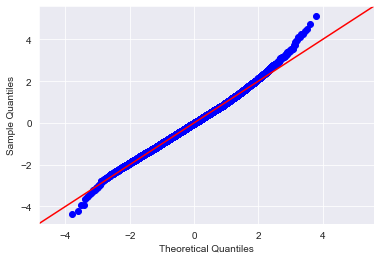

In [337]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


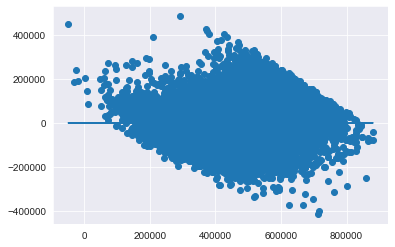

In [338]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 585000.0
0.81 percentile: 595000.0
0.82 percentile: 600000.0
0.83 percentile: 610000.0
0.84 percentile: 620000.0
0.85 percentile: 629000.0
0.86 percentile: 639460.0000000001
0.87 percentile: 650000.0
0.88 percentile: 658500.0
0.89 percentile: 670000.0
0.9 percentile: 680000.0
0.91 percentile: 695000.0
0.92 percentile: 705000.0
0.93 percentile: 719000.0
0.94 percentile: 732451.9999999998
0.95 percentile: 749950.0
0.96 percentile: 760000.0
0.97 percentile: 780000.0
0.98 percentile: 799972.4
0.99 percentile: 820000.0


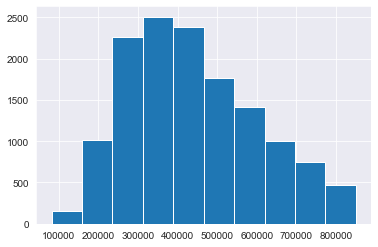

In [339]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [340]:
df = df[df.price <= 780000.0]


In [341]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2175.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:24   Log-Likelihood:            -1.7121e+05
No. Observations:               13336   AIC:                         3.424e+05
Df Residuals:                   13324   BIC:                         3.425e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.222e+04   1054.844    -11.581      0.000   -1.43e+04   -1.01e+04
bathrooms              5638.1541   1327.377      4.248      0.000    3036.306    8240.002
sqft_living            8.205e+04   1663.297     49.332      0.000    7.88e+04    8.53e+04
sqft_lot               2568.4783    995.395      2.580      0.010     617.362    4519.595
distance_from_a_city  -8.619e+04    974.240    -88.467      0.000   -8.81e+04   -8.43e+04
Years_last_renovation  1.429e+04   1281.301     11.155      0.000    1.18e+04    1.68e+04
basement              -2.063e+04   1810.670    -11.394      0.000   -2.42e+04   -1.71e+04
cond3                   4.52e+05   1398.790    323.147      0.000    4.49e+05    4.55e+05
grade                  4.603e+04   1229.139     37.452      0.000    4.36e+04    4.84e+04
biggerliving          -2.653e+04   1947.053    -13.624      0.000   -3.03e+04   -2.27e+04
cond4                  4.688e+05   1927.840    243.190      0.000    4.65e+05    4.73e+05
cond5                  4.914e+05   3170.130    155.011      0.000    4.85e+05    4.98e+05
==============================================================================
Omnibus:                       77.830   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.145
Skew:                           0.139   Prob(JB):                     7.24e-20
Kurtosis:                       3.285   Cond. No.                         7.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

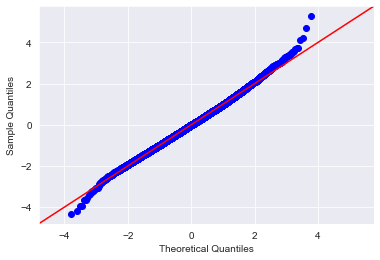

In [342]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


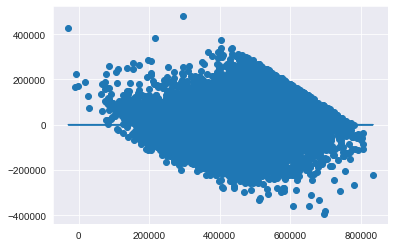

In [343]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [344]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [345]:
residuals = model.resid

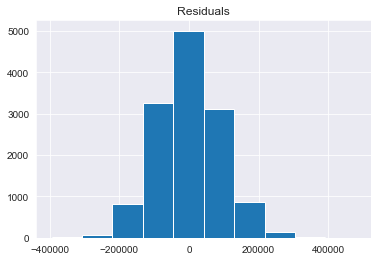

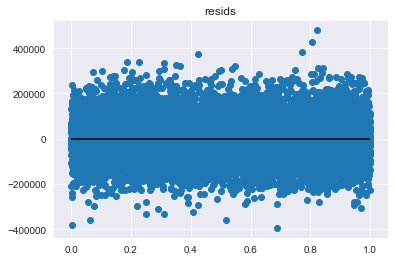

In [346]:
plot_residuals(residuals)

In [347]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [348]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [349]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6389592120215141, 0.6358549924919048, 0.6365614680155929)

In [350]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-8336745839.758519, -8351442524.931444, -8321934280.550156)

In [351]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-72190.43005034364, -72256.10153491658, -72124.32823460826)

In [352]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [353]:
make_ols_sklearn(X, y)

train R2 score = 0.6417816835276549
test R2 score = 0.6436124946955284
cv5 R2 score = 0.6389592120215141
cv10 R2 score = 0.6358549924919048
cv5 MSE score = -8336745839.758519
cv10  MSE score = -8351442524.931444


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [354]:
make_ols_sklearn(X, y)

train R2 score = 0.642598157275565
test R2 score = 0.6408168595779588
cv5 R2 score = 0.6389592120215141
cv10 R2 score = 0.6358549924919048
cv5 MSE score = -8336745839.758519
cv10  MSE score = -8351442524.931444


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [355]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

In [356]:
resid['residuals']  = residuals

In [357]:
resid

,price,residuals
0,538000.0,59693.926497
1,180000.0,-46209.423206
2,604000.0,129334.822206
3,510000.0,29140.186405
5,291850.0,50004.741703
...,...,...
17201,475000.0,9558.474127
17202,360000.0,-101243.117714
17203,400000.0,-107881.226027
17204,402101.0,-60347.244864


In [358]:
import seaborn as sns

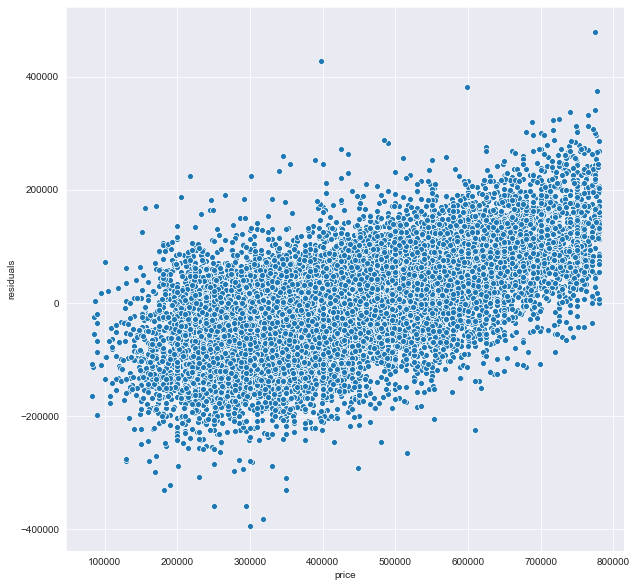

In [359]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)